# Machine Learning - K Means Clustering
K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points together.

- "Unsupervised" means: it doesn't use labels or answers — it figures things out on its own.

- The goal is to divide the data into K clusters (groups), where each group contains data points that are similar to each other.

In [84]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [85]:
# Loading Dataset From Github
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)


## 1. Exploring Data

In [86]:
# Checking first 5 rows of dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
# Checking last 5 rows of the Dataset
df.tail(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [88]:
# Checking all the column names
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [89]:
# Checking total rows and columns in our data
df.shape


(200, 5)

In [90]:
# Checkimg the total non - null values and the columns datatype in our dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 2. Statistical Analysis

In [91]:
# Checking all the important Stats
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 3. Handling Null Values

In [92]:
# Checking total null values in each column
df.isnull().sum()

# This dataset has 0 null values


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 4. Selecting Features


In [93]:
# Selecting x as features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## 5. Scaling

In [94]:
# Scaling because spending score is greater than annual income
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)
xScaled


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## 6. Finding Number of Clusters

In [95]:
inertia = []
for n in range(1, 15):
  algorithm = KMeans(n_clusters = n, random_state = 42)
  algorithm.fit(xScaled)
  inertia.append(algorithm.inertia_)


#### Step 1. Elbow Method

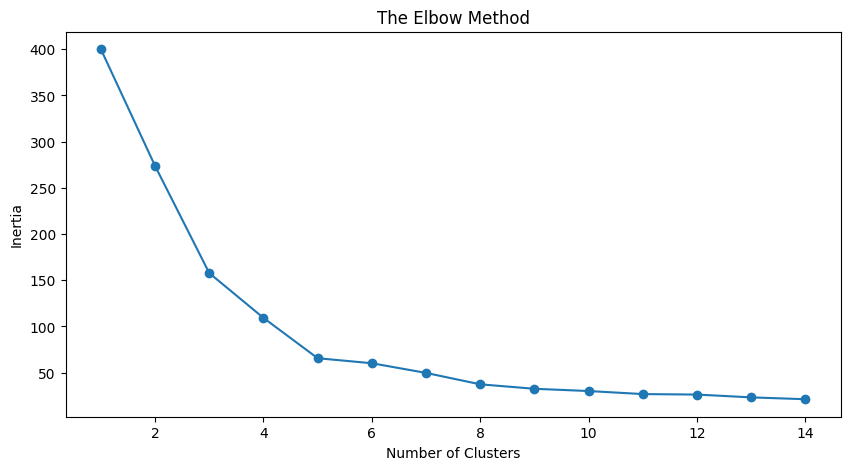

In [96]:
# Making a plot
plt.figure(figsize = (10, 5))

# Making plot using circles as points
plt.plot(range(1, 15), inertia, marker = 'o')

# Deciding the title
plt.title('The Elbow Method')

# Deciding the x and y labels
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Showing the plot
plt.show()


#### Step 2. Silhouette Method

In [97]:
# Using Silhouette to choose Value of K
for k in range(2, 7):
  algorithm = KMeans(n_clusters = k, random_state = 42)
  algorithm.fit(xScaled)
  labels1 = algorithm.labels_
  print(f"Silhouette Score for k = {k}: {silhouette_score(xScaled, labels1)}")


  # Taking K = 5 as it is the nearest to 1

Silhouette Score for k = 2: 0.3973270007887498
Silhouette Score for k = 3: 0.46658474419000145
Silhouette Score for k = 4: 0.49434988482196784
Silhouette Score for k = 5: 0.5546571631111091
Silhouette Score for k = 6: 0.5138257534676561


## 7. Using K = 5

In [98]:
# Using K = 5
algorithm = KMeans(n_clusters = 5, tol = 0.0001, random_state = 42)
algorithm.fit(xScaled)

# Making labels and Cnetroids
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


## 8. Visualization of Clusters with Their Centroids

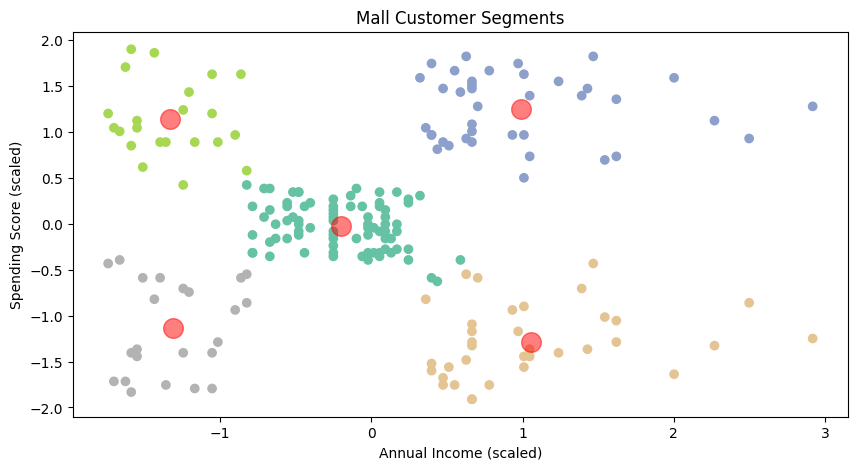

In [99]:
# Selecting the Figure Size
plt.figure(figsize = (10, 5))

# Plotting the Clusters
plt.scatter(xScaled[:, 0], xScaled[:, 1], c = labels1, cmap = 'Set2')

# Plotting the Centroids
plt.scatter(centroids1[:, 0], centroids1[:, 1], c ='Red', label = 'Centroids', s=200, alpha = 0.5)

# Selecting titles and labels
plt.title("Mall Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")

# Showing plot
plt.show()
